Import Required Libraries


In [15]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Natural Language Processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

#Download Required NLTK Data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
   import nltk

In [24]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Load the Dataset

In [16]:
df=pd.read_csv("Product_Reviews_Dataset.csv")

In [17]:
print(df.head())

                                         Review Sentiment
0  It's just okay, nothing to write home about.   neutral
1                Decent product for casual use.  positive
2               A perfect choice for daily use.  positive
3         Disappointed, I expected much better.  negative
4               Reliable and does the job well.   neutral


Data Preprocessing

Clean Text Data

In [18]:
print(df.columns)

Index(['Review', 'Sentiment'], dtype='object')


In [19]:
def clean_text(text):
  text=re.sub(r"[^a-zA-Z\s]","",text)
  text.lower()
  text.strip()
  return text
df['Cleaned_Review'] = df['Review'].apply(clean_text)


In [20]:
print(df.columns)

Index(['Review', 'Sentiment', 'Cleaned_Review'], dtype='object')


Remove stopwords and Apply Lemmatization

In [25]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = nltk.word_tokenize(text)  # Tokenize text
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatize and remove stopwords
    return " ".join(words)

df['Processed_Review'] = df['Cleaned_Review'].apply(preprocess_text)


In [26]:
print(df.columns)


Index(['Review', 'Sentiment', 'Cleaned_Review', 'Processed_Review'], dtype='object')


Convert Text to Numeric Data

In [27]:
# Create TF-IDF Vectorizer
tfidf=TfidfVectorizer(max_features=500)
X=tfidf.fit_transform(df['Processed_Review']).toarray()
y=df['Sentiment']


#Encode Labels into numeric values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

Split Data into Training and Testing Set

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Train the model

Logistic Regression

In [29]:
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

y_pred=lr_model.predict(X_test)


print("Logistic Regression Results:")
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))



Logistic Regression Results:
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.50      0.60      0.55         5
           2       0.00      0.00      0.00         3

    accuracy                           0.50        10
   macro avg       0.39      0.53      0.45        10
weighted avg       0.38      0.50      0.43        10



Random Forest

In [30]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

y_pred_rf=rf_model.predict(X_test)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.4
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.50      0.40      0.44         5
           2       0.00      0.00      0.00         3

    accuracy                           0.40        10
   macro avg       0.33      0.47      0.37        10
weighted avg       0.35      0.40      0.36        10



Visualize Reports

Confusion matrix

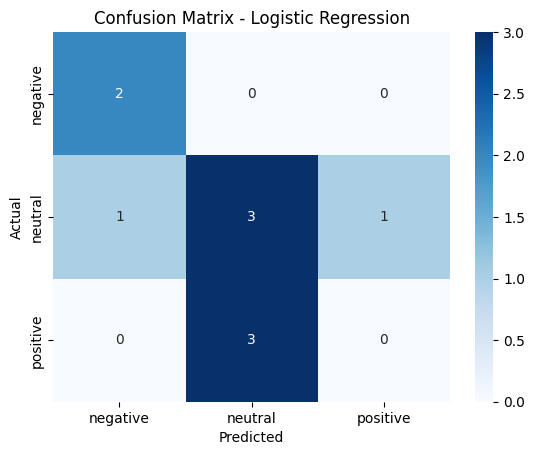

In [31]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=le.classes_,yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [32]:
print(cm)

[[2 0 0]
 [1 3 1]
 [0 3 0]]
